In [1]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM5 import SCM5

  0%|          | 0/2 [00:00<?, ?it/s]

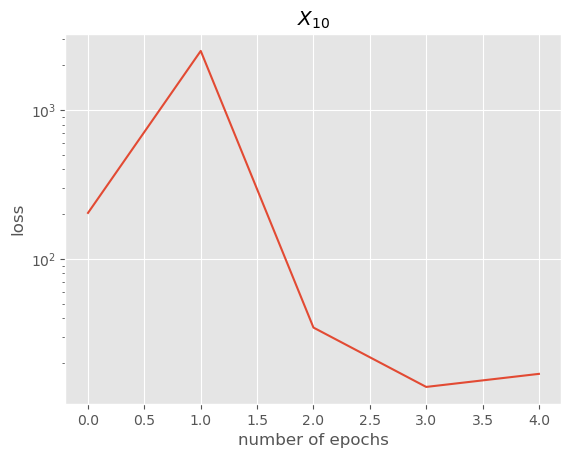

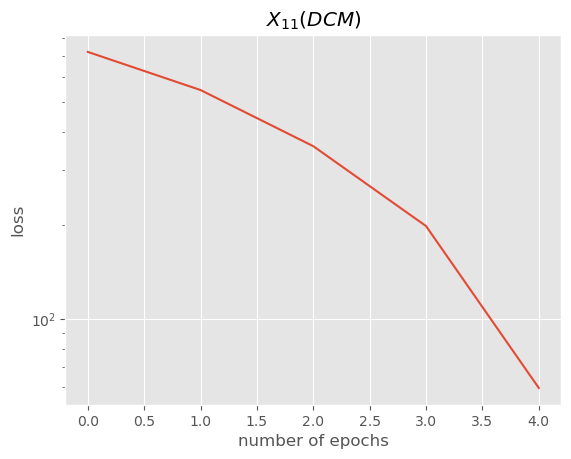

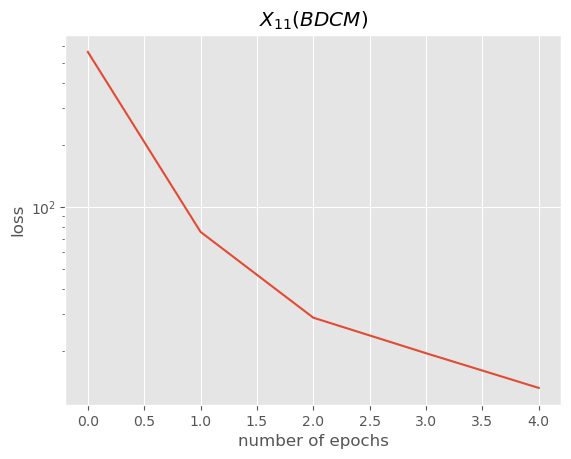

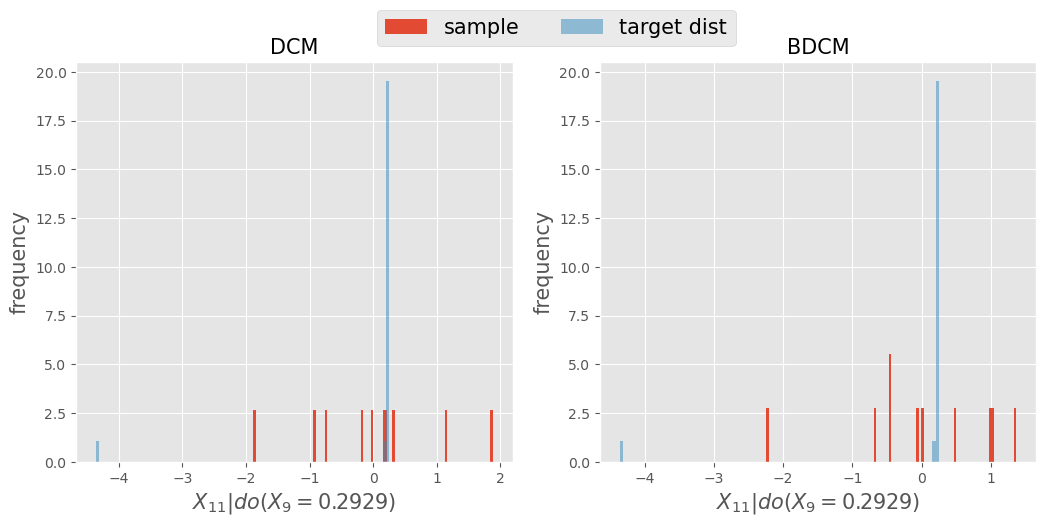

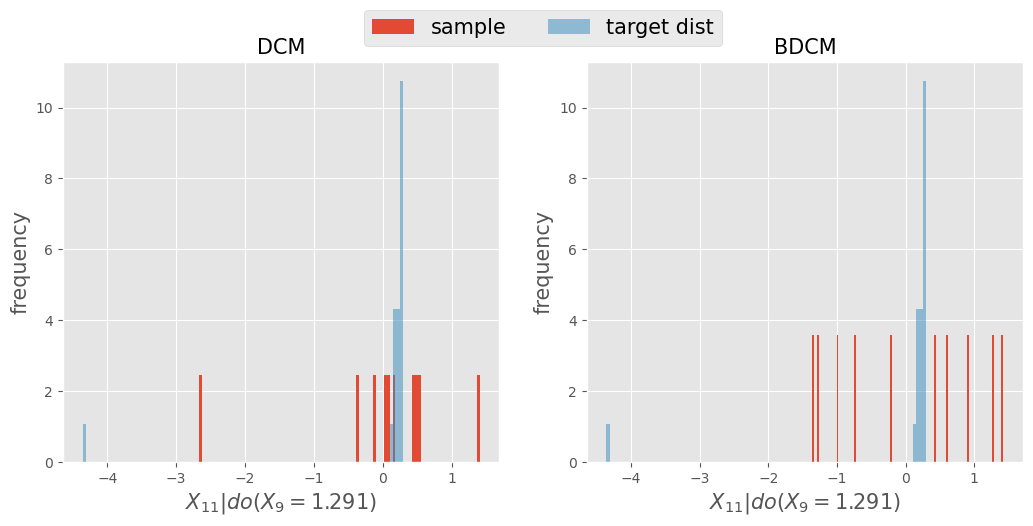

 50%|█████     | 1/2 [00:01<00:01,  1.47s/it]

mean of MMD for DCM: 0.0187
standard deviation of MMD for DCM: 0.00335
mean of MMD for BDCM: 0.0207
standard deviation of MMD for BDCM: 0.00118


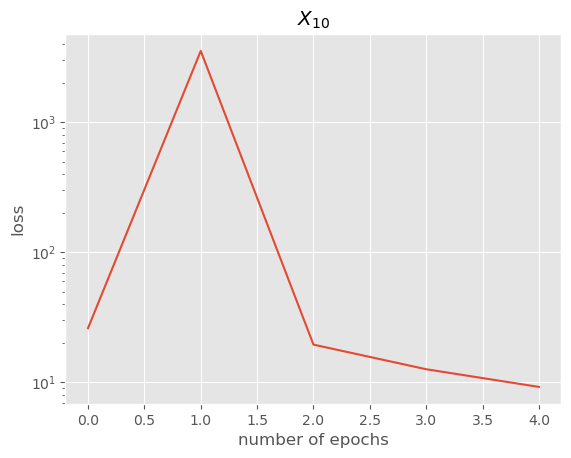

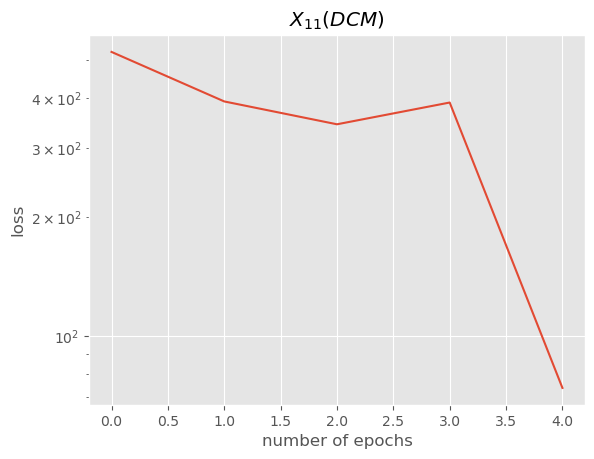

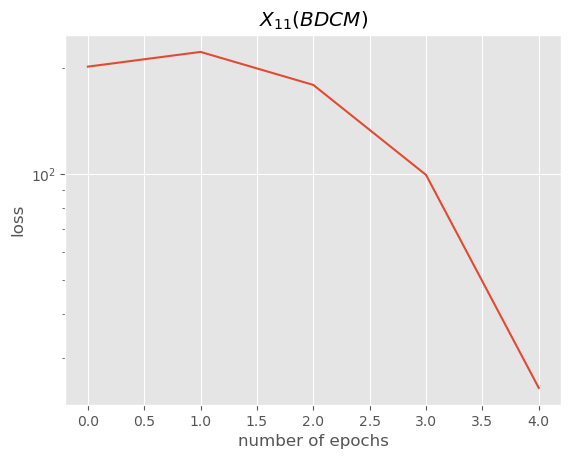

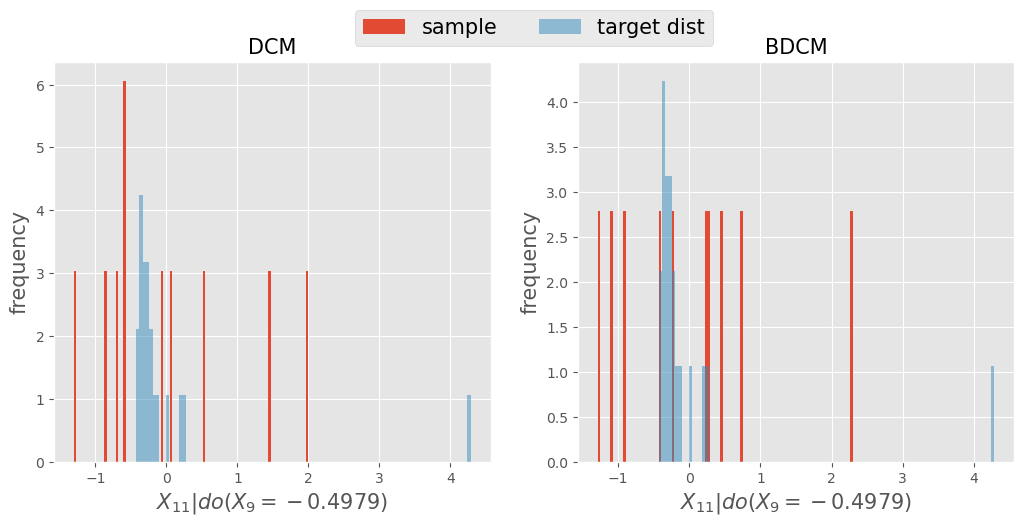

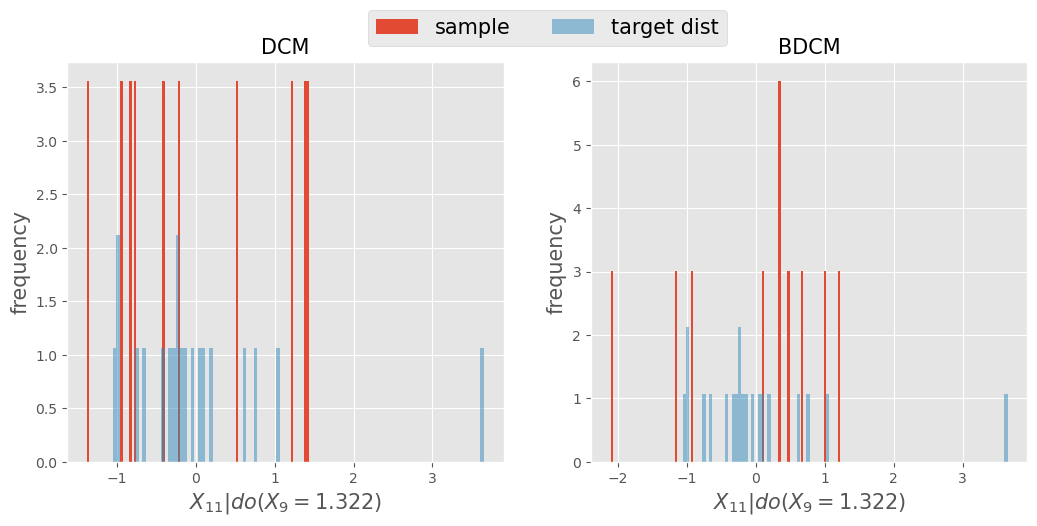

100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

mean of MMD for DCM: 0.00436
standard deviation of MMD for DCM: 0.00106
mean of MMD for BDCM: 0.00516
standard deviation of MMD for BDCM: 0.000277
mean of all MMD for DCM: 0.0115
standard deviation of all MMD for DCM: 0.00757
mean of all MMD for BDCM: 0.0129
standard deviation of all MMD for BDCM: 0.0078


In [2]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = -x[0] ** 2 + u
  elif ind == 2:
    output = x[1] + 0.1 + u
  elif ind == 3:
    output = -x[1] ** 3 + x[1] + 0.5 + u
  elif ind == 4:
    output = x[0] ** 2 + 0.1 + u
  elif ind == 5:
    output = - (x[4] + 0.1) ** 2 + x[4] + u
  elif ind == 6:
    output = -x[5] ** 2 - x[5] + u
  elif ind == 7:
    output = 3 * x[5] + 0.1 + u
  elif ind == 8:
    output = x[0] * x[4] + (x[0] + 0.2) ** 2 - x[4] ** 2 + u
  elif ind == 9:
    output = x[8] ** 2 + u
  elif ind == 10:
    output = x[2] * x[3] * (x[6] * x[7] - 0.1) + x[8] * x[9] + x[2] * x[8] - x[6] * x[9]
  return normalize(output)

SCM5(structural_eq=structural_eq, simple_or_complex = "simple")